# Lucid local development notebook

This notebook allows you to use your development version of the lucid codebase.
It is meant to only be used during development of lucid, not when using it.

Instead, see "usage_example.ipynb" in this folder for an example of how to use lucid in a notebook.

## Setup

### Add local package to search path

In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Now we should be able to import it directly, just like if we installed it using `pip`:

```python
import lucid
```

However, we will use `autoreload` so we can quickly iterate on local code changes:

### Enable autoreload

In [6]:
%load_ext autoreload

In [7]:
%aimport lucid
%aimport -tensorflow
%aimport -numpy
%aimport -sklearn

In [8]:
%aimport

Modules to reload:
lucid

Modules to skip:
numpy sklearn tensorflow


Let's check that we're actually seeing the local version, not a package installed in site-packages.
Th next cell should show the path at which you cloned the lucid repo, not a system path:

In [ ]:
module_path = lucid.__path__[0]
print("Lucid was loaded from {}.".format(module_path))
assert os.path.abspath("..") in module_path
del module_path

## Example usage

In [10]:
import numpy as np

In [11]:
image = np.random.normal(loc=.5, scale=.1, size=(200,200))

In [12]:
# this is how you set log levels globally:

import logging
logging.getLogger('lucid').setLevel(logging.DEBUG)

# or per module:
# logging.getLogger('lucid.misc.io').setLevel(logging.INFO)

In [13]:
%autoreload

from lucid.misc.io import load, save, show

image = load('../tests/fixtures/noise.jpeg')

print(image.dtype)
show(image)

DEBUG:lucid.misc.io.loading:Using inferred loader 'img' due to passed file extension '.jpeg'.
DEBUG:lucid.misc.io.showing:Show is assuming rank 2 or 3 tensor to be an image.
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.


float32


In [14]:
array = load("../tests/fixtures/noise.jpeg")
print(array.dtype, array.shape)
show(array, domain=None)
array

DEBUG:lucid.misc.io.loading:Using inferred loader 'img' due to passed file extension '.jpeg'.
DEBUG:lucid.misc.io.showing:Show is assuming rank 2 or 3 tensor to be an image.
DEBUG:lucid.misc.io.serialize_array:No domain specified, normalizing from measured (~0.23, ~0.71)
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by subtracting -0.23.
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 537.40.


float32 (5, 10, 3)


array([[[0.40392157, 0.40392157, 0.40392157],
        [0.5921569 , 0.5921569 , 0.5921569 ],
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.4627451 , 0.4627451 , 0.4627451 ],
        [0.30980393, 0.30980393, 0.30980393],
        [0.6039216 , 0.6039216 , 0.6039216 ],
        [0.56078434, 0.56078434, 0.56078434],
        [0.5058824 , 0.5058824 , 0.5058824 ],
        [0.52156866, 0.52156866, 0.52156866],
        [0.39215687, 0.39215687, 0.39215687]],

       [[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.61960787, 0.61960787, 0.61960787],
        [0.4117647 , 0.4117647 , 0.4117647 ],
        [0.52156866, 0.52156866, 0.52156866],
        [0.48235294, 0.48235294, 0.48235294],
        [0.50980395, 0.50980395, 0.50980395],
        [0.34117648, 0.34117648, 0.34117648],
        [0.4745098 , 0.4745098 , 0.4745098 ],
        [0.39215687, 0.39215687, 0.39215687],
        [0.42352942, 0.42352942, 0.42352942]],

       [[0.27450982, 0.27450982, 0.27450982],
        [0.44313726, 0.4431372

DEBUG:lucid.misc.io.loading:Using inferred loader 'img' due to passed file extension '.png'.
DEBUG:lucid.misc.io.reading:Cache not specified, enabling because resource is remote.
DEBUG:lucid.misc.io.reading:Found cached file '/var/folders/99/xnsk42fs7sx6d3v5359sgstw0000gn/T/lucid_cache/https___www_google_com_images_branding_googlelogo_2x_googlelogo_color_272x92dp_png'.
DEBUG:lucid.misc.io.showing:Show is assuming rank 2 or 3 tensor to be an image.
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.



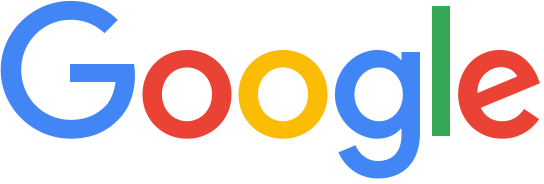

In [15]:
show(load("https://www.google.com/images/branding/googlelogo/2x/googlelogo_color_272x92dp.png"))

## Optvis Usage

In [3]:
# silence unnecessarily loud TF warnings that we can't do anything about
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf

from lucid.optvis import objectives, param, transform, render
from lucid.modelzoo.vision_models import InceptionV1

In [4]:
model = InceptionV1()
model.load_graphdef()

32 321.07315



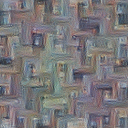

256 657.35583



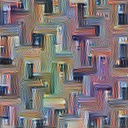

1024 508.675



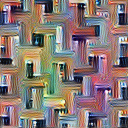

In [9]:
%autoreload

_ = render.render_vis(model, "mixed3b_pre_relu:470", thresholds=(32, 256, 1024))

In [16]:
import os
repr(os.urandom(16))

"b'\\xa0\\n*\\x80O\\xfc\\xd2\\xf5\\xbe;\\x02\\xd8[\\x8f\\x03-'"

In [17]:
import numpy as np
from lucid.misc.channel_reducer import ChannelReducer

In [18]:
array = np.zeros((100,100,10), dtype=np.float32)
for d in range(array.shape[-1]):
    array[:,:,d] = np.eye(100,100)

In [19]:
array += 0.1 * np.random.uniform(size=array.shape)

In [20]:
reducer = ChannelReducer(3, reduction_alg='PCA')

In [21]:
reducer.fit(array)

PCA(n_components=3)

In [22]:
reducer._reducer.components_

array([[ 0.31585112,  0.31752598,  0.31635785,  0.31505188,  0.3165172 ,
         0.31539828,  0.316519  ,  0.31615508,  0.3165218 ,  0.3163727 ],
       [-0.08982895, -0.16332276,  0.30622938, -0.21362592, -0.04177361,
        -0.4826194 ,  0.60908014,  0.39536655, -0.0824452 , -0.23892856],
       [ 0.219242  ,  0.10418469, -0.4300775 , -0.60175824, -0.15431193,
         0.27243984,  0.4354095 , -0.16853243,  0.2754555 ,  0.04586032]],
      dtype=float32)

In [23]:
reduced = reducer.transform(array)

DEBUG:lucid.misc.io.showing:Show is assuming list or tuple to be a collection of images.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~-0.13, ~3.20) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~-0.09, ~0.10) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~-0.10, ~0.11) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.



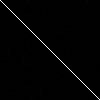
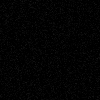
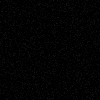

In [24]:
show(np.dsplit(reduced, reduced.shape[-1]))

DEBUG:lucid.misc.io.showing:Show is assuming list or tuple to be a collection of images.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~0.00, ~1.10) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~0.00, ~1.10) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~0.00, ~1.10) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~0.00, ~1.10) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.
INFO:lucid.misc.io.serialize_array:Clipping domain from (~0.00, ~1.10) to (~0.00, ~1.00).
DEBUG:lucid.misc.io.serialize_array:Converting inexact array by scaling by 255.00.
INFO:lucid.misc.io.serialize_array:Clipping do


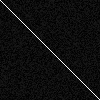
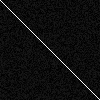
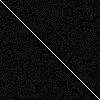
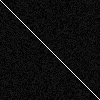
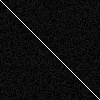
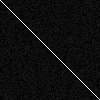
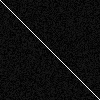
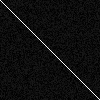
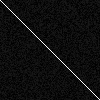
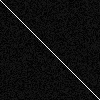

In [25]:
from lucid.misc.io import load, save, show

show(np.dsplit(array, array.shape[-1]))